In [2]:
import pyedflib
import numpy as np
import os
%run scripts/readEDF.py

data_folder = '/'.join(os.getcwd().split('/')[:-1]) + '/ANES212_data/chb01/'
data_file = 'chb01_15.edf'
print data_folder + data_file
f = pyedflib.EdfReader(data_folder + data_file)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

/Users/christine/Documents/GitHub/ANES212_data/chb01/chb01_15.edf


In [71]:
f = read_single_edf('chb01_03.edf')

NameError: global name 'temp_d' is not defined

In [4]:
import matplotlib.pyplot as plt

for i in range(sigbufs.shape[0]):
    plt.plot(sigbufs[i,:][::256])
plt.show()

<Figure size 640x480 with 1 Axes>

In [69]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = len(a)
print(b)
y = sigbufs[:,::256]
print(y.shape)

3
(23, 3600)


/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


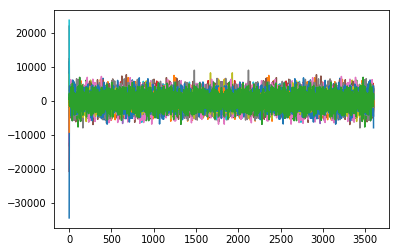

In [18]:
from scipy.fftpack import fft
y = sigbufs[:,::256]
# Number of sample points
N = len(y[0])
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
for i in range(y.shape[0]):
    yf[i,:] = fft(y[i,:])
    plt.plot(yf[i,:])
plt.show()
#xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#import matplotlib.pyplot as plt
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.grid()
#plt.show()

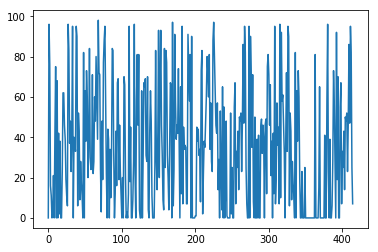

In [73]:
from scipy.fftpack import fft
y = sigbufs[:,::256]
# Number of sample points
N = len(y[0])
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
maxf=0
for i in range(y.shape[0]):
    for j in range(0,N/200):
        yf = fft(y[i,j*200:j*200+200-1])
        val = np.argmax(np.abs(yf))
        maxf = np.append(maxf,val)
plt.plot(maxf)
plt.show()

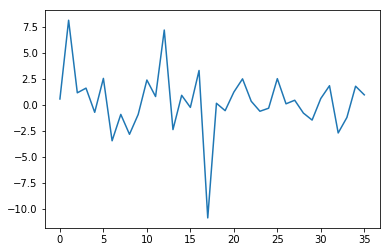

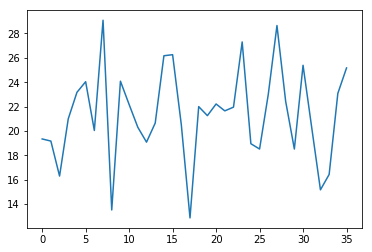

In [5]:
from scipy.fftpack import fft
y = sigbufs[:,::256]
# Number of sample points
N = len(y[0])
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
avgmag=[]
avgf=[]
w=100 #size of window
for i in range(0,N/w):
    mag=[]
    maxf=[]
    for j in range(y.shape[0]):
        mag.append(np.mean(y[j,i*w:i*w+w]))
        yf = fft(y[j,i*w:i*w+w])
        val = np.argmax(np.abs(yf))
        maxf.append(val)
    avgmag.append(np.mean(mag))
    avgf.append(np.mean(maxf))
plt.plot(avgmag)
plt.show()
plt.plot(avgf)
plt.show()

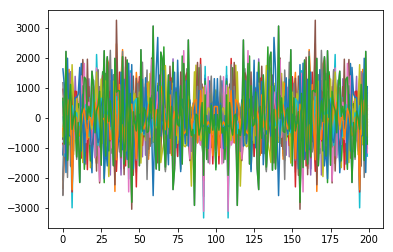

In [26]:
from scipy.fftpack import fft
for i in range(y.shape[0]):
    yf = fft(y[i,2900:3100])
    yf2 = fft(y[i,1400:1600])
    plt.plot(yf2-yf)
plt.show()

In [58]:
a = 1
a=np.append(a,5)
print(a)

[1 5]


In [ ]:
df.as_matrix() #convert data frame to matrix
df['seizure'] #get one 
df.iloc[0,0] #get a value in the data frame
df.loc[df['seizure']==1] #all the rows/times with a seizure